In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test  =  x_train/255.0,x_test/255.0

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6,(5,5),strides=1,padding='valid',activation='sigmoid'),
    tf.keras.layers.MaxPool2D((2,2),strides=2,padding='valid'),
    tf.keras.layers.Conv2D(16,(5,5),strides=1,padding='valid',activation='sigmoid'),
    tf.keras.layers.MaxPool2D((2,2),strides=2,padding='valid'),                     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120,activation='sigmoid'),
    tf.keras.layers.Dense(84,activation='sigmoid'),
    tf.keras.layers.Dense(10,activation='softmax'),   
])

In [6]:
model.compile(optimizer='adam',
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['acc'])

In [7]:
history = model.fit(x_train,y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data = (x_test,y_test),
                    validation_freq=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 9s 187us/sample - loss: 2.0248 - acc: 0.2382 - val_loss: 1.7735 - val_acc: 0.3508
Epoch 2/5
50000/50000 [==============================] - 6s 111us/sample - loss: 1.7088 - acc: 0.3716 - val_loss: 1.6430 - val_acc: 0.4015
Epoch 3/5
50000/50000 [==============================] - 5s 107us/sample - loss: 1.6137 - acc: 0.4069 - val_loss: 1.5897 - val_acc: 0.4242
Epoch 4/5
50000/50000 [==============================] - 5s 109us/sample - loss: 1.5588 - acc: 0.4280 - val_loss: 1.5155 - val_acc: 0.4457
Epoch 5/5
50000/50000 [==============================] - 5s 107us/sample - loss: 1.4998 - acc: 0.4498 - val_loss: 1.4595 - val_acc: 0.4615


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  48120     
_________________________________________________________________
dense_1 (Dense)              multiple                  1

In [9]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [10]:
loss =  history.history.get('loss')
val_loss =history.history.get('val_loss')

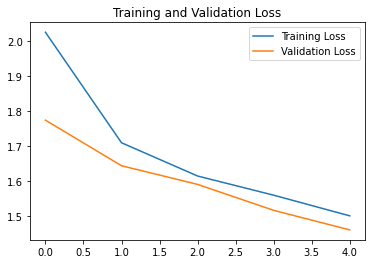

In [12]:
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

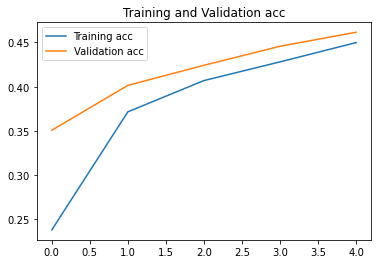

In [13]:
plt.plot(acc,label='Training acc')
plt.plot(val_acc,label='Validation acc')
plt.title('Training and Validation acc')
plt.legend()